In [1]:
%autosave 0

Autosave disabled


---
# Projet KIT DATA par DOMINIQUE JEANCLER NOVEMBRE 2020
---

![](https://media.giphy.com/media/3rlkI1QFJWRUsdRtha/giphy.gif)

In [2]:
import numpy as np
import pandas as pd
import pickle 
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Avant -propos

### Divers infos sur l'édition 2020 :

* 33 équipages prennent le départ 
* Favoris d'après une source "on ne peut plus sûr" i.e. OUEST FRANCE :

    * 1.Jérémie Beyou
    * 2.Alex Thomson
    * 3.Charlie Dalin
    * 4.Thomas Ruyant
    * 5.Nicolas Troussel
    
https://www.ouest-france.fr/vendee-globe/vendee-globe-qui-va-gagner-voici-les-favoris-d-ouest-france-7021036

* Après multiple péripéties, le départ est donné à 14h20 le 8 novembre (https://www.ouest-france.fr/vendee-globe/vendee-globe-en-raison-du-brouillard-le-depart-de-l-epreuve-est-reporte-7044168).

### Classement dernière session (source wikipedia) :

In [3]:
### Accès au tableau classement dernière édition via wikipedia
#var = pd.read_html("https://fr.wikipedia.org/wiki/Vend%C3%A9e_Globe")[df.shape for df in var]
#df_derniere_edition = var[33]
#df_derniere_edition.to_pickle('df_derniere_edition_bckup')
df_derniere_edition=pd.read_pickle('df_derniere_edition_bckup') # sécurité mise à jour Wiki
df_derniere_edition

,Place,Nom du concurrent,Nationalité,Nom du bateau,Temps
0,1,Armel Le Cléac’h,France,Banque Populaire VIII,074 j 03 h 35 min 46 s (nouveau record)[5]
1,2,Alex Thomson,Royaume-Uni,Hugo Boss,074 j 19 h 35 min 15 s
2,3,Jérémie Beyou,France,Maître Coq,078 j 06 h 38 min 40 s
3,4,Jean-Pierre Dick,France,StMichel-Virbac,080 j 01 h 45 min 45 s
4,5,Yann Eliès,France,Quéguiner - Leucémie Espoir,080 j 03 h 11 min 09 s
5,6,Jean Le Cam,France,Finistère Mer Vent,080 j 04 h 41 min 54 s
6,7,Louis Burton,France,Bureau Vallée,087 j 21 h 45 min 49 s
7,8,Nándor Fa,Hongrie,Spirit of Hungary,093 j 22 h 52 min 09 s
8,9,Éric Bellion,France,Comme un seul homme,099 j 04 h 56 min 20 s
9,10,Arnaud Boissières,France,La Mie câline,102 j 20 h 24 min 09 s


### Abandon dernière session (source wikipedia) :

In [4]:
#df_abandon_derniere_edition = var[34]
#df_abandon_derniere_edition.to_pickle('df_abandon_derniere_edition_bckup')
df_abandon_derniere_edition=pd.read_pickle('df_abandon_derniere_edition_bckup') # sécurité mise à jour Wiki
df_abandon_derniere_edition

,Nom du concurrent,Nationalité,Nom du bateau,Raison de l'abandon,Lieu
0,Bertrand de Broc[59],France,MACSF,Carénage endommagé,Ile de Fernando de Noronha
1,Vincent Riou[60],France,PRB,Avarie de quille,Atlantique Sud (après 15 jours de course)
2,Morgan Lagravière[61],France,Safran II,Avarie du safran,Atlantique Sud (après 18 jours de course)
3,Tanguy de Lamotte,France,Initiatives-Cœur,Casse tête de mât,"îles du Cap-Vert (Mindelo), retour aux Sables-..."
4,Kojiro Shiraishi,Japon,Spirit of Yukoh,Casse du mât,Quelques milles avant le passage Bonne-Espérance
5,Kito de Pavant,France,Bastide-Otio,Quille rompue et coque endommagée avec voie d'eau,150 milles au Nord-Est des îles Crozet
6,Sébastien Josse,France,Edmond de Rothschild,Avarie majeure du foil bâbord,Sud de l'Australie
7,Thomas Ruyant,France,Le Souffle du Nord pour Le Projet Imagine,Dégâts structurels importants,"Bluff, Nouvelle-Zélande"
8,Stéphane Le Diraison,France,Compagnie du Lit-Boulogne Billancourt,Démâtage,"Océan Indien, Sud Autralie"
9,Paul Meilhat,France,SMA,Vérin de quille fissuré,Point Nemo


# 1. Récupération des données

## 1.1 Classements

### Visu d'un fichier de classement
Les classements sont des données sous format Excel disponible via l'adresse URL :https://www.vendeeglobe.org/fr/classement. 

Fort heureusement en ouvrant le menu déroulant on peut s'apercevoir que les classements sont mis à jour 6 fois par jour à heure fixe en suivant une syntaxe monotone i.e "https://www.vendeeglobe.org/download-race-data/vendeeglobe_jour_heure.xls" (4h 8h 11h 14h 17h 21h). Nous proposons donc de récupérer l'ensemble des fichiers en une seule boucle.

Avant de le faire, observons sur un premier test ce que retourne le fichier avec un chargement brut via `pd.read_excel` Pour ce test, nous prenons le premier fichier disponilbe i.e. le 20 novembre à 15H.

In [5]:
url = "https://www.vendeeglobe.org/download-race-data/vendeeglobe_20201108_150000.xlsx"
df_test = pd.read_excel(url)
df_test.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Classement du dimanche 08 novembre 2020 à 17h0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,NaN,NaN,NaN,Depuis 30 minutes\nSince 30 minutes,NaN,NaN,...,Depuis le dernier classement\nSince the the la...,NaN,NaN,NaN,Depuis 24 heures\nSince 24 hours,NaN,NaN,NaN,DTF,DTL
3,NaN,NaN,NaN,NaN,Heure FR\nHour FR,Latitude\nLatitude,Longitude\nLongitude,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,...,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,NaN,NaN
4,NaN,1,\nFRA 8,Jérémie Beyou\nCharal,17:00 FR\n,46°20.72'N,02°35.50'W,268°,26.0 kts,22.6 kts,...,262°,21.1 kts,19.7 kts,31.7 nm,254°,1.4 kts,1.4 kts,34.5 nm,24265.1 nm,0.0 nm


**Horreur !!!** le formattage d'Excel (fusion de colonnes, saut de ligne) rend le tableau inutilisable en l'état. Nous prenons les décisions suivantes pour l'import :
* Ignorer l'entête
* Définir nos propres noms pour les colonnes
* Faire une sélection judicieuse des lignes et colonnes (usecols = colonnes cibles / skiprows = entête inutile / nrows = nbr d'équipage)

**NB : Comme nous prévoyions de récupérer tous les fichiers Excel depuis le début de la course, nous ignorons les colonnes en rapport à la vitesse et distances redondantes pour 30 min et 24h et ne gardons que celle mesuré par rapport au dernier fichier de classement.** 


In [6]:
name=['Rang','Identifiant','Bateau','HR','Lat','Long','Cap','Vitesse','VMG','Distance','DTF','DTL']
df_test = pd.read_excel(url,header=None,usecols="B:G,L:O,T:U",skiprows=5,nrows=33,
                        names=name,encoding='UTF-8')
df_test

,Rang,Identifiant,Bateau,HR,Lat,Long,Cap,Vitesse,VMG,Distance,DTF,DTL
0,1,\nFRA 8,Jérémie Beyou\nCharal,17:00 FR\n,46°20.72'N,02°35.50'W,262°,21.1 kts,19.7 kts,31.7 nm,24265.1 nm,0.0 nm
1,2,\nFRA 79,Charlie Dalin\nAPIVIA,17:00 FR\n,46°17.46'N,02°31.45'W,357°,0.0 kts,0.0 kts,2782.5 nm,24265.8 nm,0.7 nm
2,3,\nGBR 99,Alex Thomson\nHugo Boss,17:00 FR\n,46°18.68'N,02°31.66'W,257°,19.9 kts,19.1 kts,29.9 nm,24266.3 nm,1.2 nm
3,4,\nFRA 59,Thomas Ruyant\nLinkedOut,17:00 FR\n,46°19.45'N,02°32.29'W,260°,19.9 kts,18.9 kts,29.9 nm,24266.3 nm,1.2 nm
4,5,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,17:00 FR\n,46°18.22'N,02°29.63'W,257°,19.0 kts,18.2 kts,28.2 nm,24267.3 nm,2.2 nm
5,6,\nFRA 6,Nicolas Troussel\nCORUM L'Épargne,17:00 FR\n,46°21.97'N,02°32.77'W,262°,19.6 kts,18.2 kts,30.3 nm,24267.4 nm,2.3 nm
6,7,\nFRA 4,Sébastien Simon\nARKEA PAPREC,17:00 FR\n,46°17.99'N,02°28.30'W,254°,18.7 kts,18.3 kts,28.4 nm,24267.9 nm,2.8 nm
7,8,\nFRA 18,Louis Burton\nBureau Vallée 2,17:00 FR\n,46°21.27'N,02°30.26'W,263°,18.4 kts,17.1 kts,27.6 nm,24268.5 nm,3.4 nm
8,9,\nFRA 109,Samantha Davies\nInitiatives - Coeur,17:00 FR\n,46°20.81'N,02°29.71'W,260°,18.8 kts,17.8 kts,28.3 nm,24268.6 nm,3.5 nm
9,10,FR\nFRA 02,Armel Tripon\nL'Occitane en Provence,17:00 FR\n,46°20.34'N,02°28.64'W,259°,18.3 kts,17.4 kts,28.1 nm,24269.0 nm,3.8 nm


In [7]:
df_test[df_test["Rang"].str.contains('[^0-9]')]

,Rang,Identifiant,Bateau,HR,Lat,Long,Cap,Vitesse,VMG,Distance,DTF,DTL
32,NL,\nFRA 14,Arnaud Boissieres\nLa Mie Câline - Artisans Ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On observe des non valeurs uniquement sur la dernière ligne qui correspond à un participant qui rencontre des couis de localisation. L'information se retrouve dans le rang par 'NL'. On verra par la suite que les participants ayant abandonnés seront noté comme 'RET' en rang. On fera attention à filtrer ces lignes par la suite. **On observe aussi clairement une faute de frappe dans la distance pour Charlie Dalin !**

### Récupération de l'ensemble des fichiers de classements

Comme décrit plus haut, on va profiter de la régularité de nommage pour concatener l'ensemble des rapports jusqu'à la veille d'une date n ou du jour du lancement de ce notebook (au choix de l'utilisateur).

* Comme précisé en avant propos,  la course a démarré à le 8 novembre à 14h30. Nous prenons comme point de départ le premier fichier Excel disponible i.e. 08 novembre à 15h.

* L'utilisateur pourra mettre à jour le DF en changeant la valeur de "date_final"

On ajoute comme sécurité de ne récupérer que les classements jusqu'à la veille pour éviter des soucis de récupération de fichier en cours d'établissement.

In [8]:
def recup_basedonne(now=datetime.date(2020, 11, 29)) :
    """
    On récupère tous les Excels jusqu'à la date précisé qu'on va ensuite traiter et merger en un seul dataframe
    """
    url_base="https://www.vendeeglobe.org/download-race-data/vendeeglobe_"
    # On commence en important un premier fichier fichier Excel puis on va concatèner sur celui-ci
    depart='20201108_150000'
    url_depart=url_base+depart+'.xlsx'
    df_depart = pd.read_excel(url_depart,header=None,usecols="B:G,L:O,T:U",skiprows=5,nrows=33,
                              na_filter = False,names=name,encoding='UTF-8')
    df_depart['Jour']=depart[0:8] # on ajoute cette colonne pour retrouver le jour comme on l'a enlevé de l'entête

    #Création d'une liste de suffixe pour récupérer les fichiers Excel pour la concaténation
    # NB : le jour du départ nous n'avons que 2 classements disponibles on va donc créer une liste en 2 étapes
    jourj=datetime.date(2020, 11, 8)
    #now= datetime.date.today() # à commenter/décommenter si on choisit d'importer jusqu'à la vielle d'aujourd'hui
    
    date_final=now.strftime("%Y%m%d")
    jourcourse = (now - jourj).days 
    listejour=[(jourj+datetime.timedelta(days=i)).strftime("%Y%m%d") for i in range (1,jourcourse)]
    suffixe=['20201108_'+j for j in ['170000','210000']]
    suffixe.extend([i+"_"+j for i in listejour for j in ['040000','080000','110000','140000','170000','210000']])

    url_boucle = [url_base+c+'.xlsx' for c in suffixe]

    for i in url_boucle:
            df_boucle = pd.read_excel(i,header=None,usecols="B:G,L:O,T:U",skiprows=5,nrows=33,
                                      na_filter = False,names=name,encoding='UTF-8')
            df_boucle['Jour']=i[-20:-12]
            df_depart=pd.concat([df_depart,df_boucle])

    nbligne,nbcol=df_depart.iloc[0::33].shape
    if (nbligne-3)/6 == int(str(date_final)[6:]) - 9:
        print(f"On a bien importé les {(nbligne-3)/6} jours complets de course depuis la veille du {date_final}")
    else:
        print(f"Problème il semble nous manquer des lignes")    

    df_depart.to_pickle('df_classement_bkup_'+date_final) # sauvegarde ne pas décommenter sauf si mis à jour
    
    return df_depart

Pour des questions de gain de temps (rechargement du notebook) et de sécurité (changement du site) on sauvegarde le dataframe en pickle. On s'occupera du formattage du DF dans la partie 2.

In [9]:
date_choix=datetime.date(2020, 11, 29) # si changement de date alors décommenter fonction
date_choisie=date_choix.strftime("%Y%m%d")
jourcourse = (date_choix - datetime.date(2020, 11, 8)).days 
#df_depart=recup_basedonne(date_choix) # à décommenter si on choisi une autre date que le 29 novembre
df_depart=pd.read_pickle('df_classement_bkup_'+date_choisie)
df_depart

,Rang,Identifiant,Bateau,HR,Lat,Long,Cap,Vitesse,VMG,Distance,DTF,DTL,Jour
0,1,\nFRA 8,Jérémie Beyou\nCharal,17:00 FR\n,46°20.72'N,02°35.50'W,262°,21.1 kts,19.7 kts,31.7 nm,24265.1 nm,0.0 nm,20201108
1,2,\nFRA 79,Charlie Dalin\nAPIVIA,17:00 FR\n,46°17.46'N,02°31.45'W,357°,0.0 kts,0.0 kts,2782.5 nm,24265.8 nm,0.7 nm,20201108
2,3,\nGBR 99,Alex Thomson\nHugo Boss,17:00 FR\n,46°18.68'N,02°31.66'W,257°,19.9 kts,19.1 kts,29.9 nm,24266.3 nm,1.2 nm,20201108
3,4,\nFRA 59,Thomas Ruyant\nLinkedOut,17:00 FR\n,46°19.45'N,02°32.29'W,260°,19.9 kts,18.9 kts,29.9 nm,24266.3 nm,1.2 nm,20201108
4,5,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,17:00 FR\n,46°18.22'N,02°29.63'W,257°,19.0 kts,18.2 kts,28.2 nm,24267.3 nm,2.2 nm,20201108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,\nFIN 222,Ari Huusela\nStark,21:30 FR\n,10°33.23'S,33°19.51'W,201°,12.5 kts,8.0 kts,50.1 nm,20907.8 nm,2619.8 nm,20201128
29,30,FR\nFRA 69,Sébastien Destremau\nMerci,21:30 FR\n,09°51.35'S,32°19.36'W,193°,11.4 kts,8.8 kts,45.5 nm,20915.4 nm,2627.3 nm,20201128
30,31,\nJPN 11,Kojiro Shiraishi\nDMG MORI Global One,21:30 FR\n,06°55.12'S,31°47.55'W,196°,13.9 kts,10.8 kts,55.6 nm,21060.0 nm,2771.9 nm,20201128
31,32,\nFRA 8,Jérémie Beyou\nCharal,21:30 FR\n,02°23.71'N,28°24.13'W,209°,8.5 kts,6.4 kts,34.2 nm,21526.6 nm,3238.5 nm,20201128


## 1.2 Caractéristiques navires

Contrairement aux classements, les données relatives aux caractérisitques techniques de bateaux ne sont pas accessible via des fichiers (csv ou autre xls) accsibles sur le site mais en html sur la page web : https://www.vendeeglobe.org/fr/glossaire. On se propose d'aspirer ces informations via l'outil BeautifulSoup pour récupérer un nouveau Dataframe.

In [10]:
from bs4 import BeautifulSoup
import requests
r = requests.get('https://www.vendeeglobe.org/fr/glossaire')
soup = BeautifulSoup(r.content,"html.parser")

En examinant le fichier source via un explorateur (plus confortable que rechercher dans la cellule de Jupyter) on aperçoit que les caractéristiques des bateaux se retrouve dans la classe 'boats-list__popup-specs-list'. On va donc aller récupérer les infos sous ce tag.

Par ailleurs, on récupère le nom du skipper pour pouvoir faire la jointure avec les données de classement car comme nous le verrons par la suite l'identifiant voile contient de nombreuses erreurs et donc plus compliqué à utiliser (tag boats-list__skipper-name).

In [11]:
bateau_param = soup.findAll('ul', attrs={'class': "boats-list__popup-specs-list"})

flotte=[]
for k in bateau_param:
    bateau_param_n = k.text.split('\n')
    flotte.append(bateau_param_n )

skipper=[]
name = soup.findAll('span', attrs={'class': "boats-list__skipper-name"})
for k in name:
    skipper.append((k.text).upper())
    
# Test pour savoir si on récuère bien le même nombre de caractéristique pour chaque bateau
nbrcarac=[len (i) for i in flotte]
(sum([j==nbrcarac[0] for j in nbrcarac])==len (flotte))

False

Comme nous n'avons pas le meme nombre de caractéristique on fait une sélection par motif pour construire un dataframe. Prenons comme exemple le premier bateau avec 16 informations :

In [12]:
#Numéro de voile : FRA1000</li>
#Anciens noms du bateau : Comme Un Seul Homme, DCNS</li>
#Architecte : Groupe Finot-Conq</li>
#Chantier : Multiplast</li>
#Date de lancement : 10 Août 2008</li>
#Longueur : 18,28 m</li>
#Largeur : 5,85 m</li>
#Tirant d'eau : 4,50 m</li>
#Déplacement (poids) : 8,5 t</li>
#Nombre de dérives : 2</li>
#Hauteur mât : 29 m</li>
#Voile quille : acier forgé</li>
#Surface de voiles au près : 350 m2</li>
#Surface de voiles au portant : 610 m2</li>"

Par manque de temps, je choisi en première approximation de ne me débarasser des informations suivantes : Ancien nom du bateau, Architecte, chantier, Date de lancement. Je récupère en sortie un Dataframe avec 9 colonnes pour 33 navires.

In [13]:
id_navire = []
longueur = []
largeur = []
tirant = []
derive = []
voile_surf_pres = []
voile_surf_portant = []
hauteur_mat =[]
deplacement=[]

for x in flotte:
    for y in x:
        if "Numéro de voile" in y:
            id_navire.append(y.split(":")[1])
        elif "Longueur" in y:
            longueur.append(y.split(":")[1])
        elif "Largeur" in y:
            largeur.append(y.split(":")[1])
        elif "Tirant d'eau" in y:
            tirant.append(y.split(":")[1])
        elif "Nombre de dériv" in y:
            derive.append(y.split(":")[1])
        elif "Surface de voiles au près" in y:
            voile_surf_pres.append(y.split(":")[1])
        elif "Surface de voiles au portant" in y:
            voile_surf_portant.append(y.split(":")[1])
        elif "Hauteur mât" in y:
            hauteur_mat.append(y.split(":")[1])
        elif "Déplacement" in y:
            deplacement.append(y.split(":")[1])

id_navire=pd.Series(id_navire)
longueur=pd.Series(longueur)
largeur=pd.Series(largeur)
tirant=pd.Series(tirant)
derive=pd.Series(derive)
voile_surf_pres=pd.Series(voile_surf_pres)
voile_surf_portant=pd.Series(voile_surf_portant)
hauteur_mat =pd.Series(hauteur_mat)
deplacement =pd.Series(deplacement)
skipper =pd.Series(skipper)


df_caracteristique_test=pd.DataFrame({'Skipper':skipper,'Identifiant':id_navire,'Longueur':longueur,'Largeur':largeur,
                        'Tirant':tirant,'Derive':derive,'SurfPres':voile_surf_pres,
                        'SurfPortant':voile_surf_portant,'Mat':hauteur_mat,
                        'deplacement':deplacement})

df_caracteristique_test

,Skipper,Identifiant,Longueur,Largeur,Tirant,Derive,SurfPres,SurfPortant,Mat,deplacement
0,FABRICE AMEDEO,FRA 56,"18,28 m","5,85 m","4,50 m",foils,320 m2,570 m2,29 m,7 t
1,ROMAIN ATTANASIO,FRA 49,"18,28m","5,80m","4,50m",2,280 m2,560 m2,28m,9t
2,ALEXIA BARRIER,FRA72,"18,28m","5,54m","4,50m",2,260 m2,580 m2,29 m,9t
3,YANNICK BESTAVEN,17,"18,28 m","5,80 m","4,50 m",foils,310 m2,550 m2,29 m,8 t
4,JÉRÉMIE BEYOU,08,"18,28 m","5,85 m","4,50 m",foils,320 m2,600 m2,29 m,8t
5,ARNAUD BOISSIÈRES,FRA 14,"18,28 m","5,65 m","4,50 m",foils,300 m²,610 m²,29 m,"7,9 tonnes"
6,LOUIS BURTON,18,"18,28 m","5,80 m","4,50 m",foils,300 m2,600 m2,28 m,"7,6 t"
7,DIDAC COSTA,ESP 33,"18,28 m","5,30 m","4,50 m",2,240 m2,470 m2,26 m,"8,9 t"
8,MANUEL COUSIN,FRA 71,"18,28 m","5,80 m","4,50 m",2 asymétriques,270 m2,560 m2,"28,50",9 t
9,CLARISSE CREMER,FRA30,"18,28 m","5,70 m","4,5 m",2,340 m2,570 m2,29 m,"7,7 t"


**Certaines caractéristique n'apportent clairement aucune info puisque sans variance** (longueur, largeur,déplacment). Ces dimensions sont probablement réglementaires ... Hormis le regret de ne pas m'etre renseigner sur ce point avant de coder je décide maintenant de limiter le dataframe aux informations à variance significative i.e. dérive et surface de la voile au près et au portant. Nous allons développer ce point ainsi que le nettoyage des données dans le paragraphe à suivre.

# 2. Nettoyage et préparation des données

## 2.1 Caractéristiques navires

On a vu au point précédent que le Dataframe "caractéristique" doit limiter ses infos au foils et surfaces de voile. Par ailleurs on prend les décisions suivante de nettoyge/transformation :

* suppression du NaN en changeant sa valeur à FRA 59 : après exploration du fichier source il s'agit d'un oubli dans le html
* transformation de la colonne foils en 0 ou 1 car il s'agit d'un test binaire présence de foils = 1 à sinon (2 dérives)
* transformation de l'identifiant en ne conservant que le nuémro (unique) pour une question de simplicité avec la jointure à venir avec le df classement
* typage des colonnes (tous entiers)

In [14]:
df_caracteristique=pd.DataFrame({'Skipper':skipper,'Identifiant':id_navire,'Foils':derive,'SurfPres':voile_surf_pres,
                        'SurfPortant':voile_surf_portant})

# Modification de l'entrée Nan
df_caracteristique.loc[df_caracteristique.index[32],'Identifiant']='FRA59'
# Mise au propre des colonnes Surface de voile
df_caracteristique['SurfPortant']=df_caracteristique['SurfPortant'].apply(lambda x: x[0:-3]).astype(int)
df_caracteristique['SurfPres']=df_caracteristique['SurfPres'].apply(lambda x: x[0:-3]).astype(int)
# Transforme la colonne dérive en test présence de foils ou non
df_caracteristique['Foils']=df_caracteristique['Foils'].str.contains('foils')*1
df_caracteristique['Foils'].astype(int)
# Mise au propre de la colonne identifiant
df_caracteristique['Identifiant']=df_caracteristique['Identifiant'].apply(lambda x: re.findall("([0-9]+)", x)).apply(lambda x: str(x)[2:-2]).astype(int)

#df_caracteristique.to_pickle('df_caracteristique_prejoint_bckup') # sauvegarde ne pas décommenter sauf si mis à jour

In [15]:
print (df_caracteristique["Skipper"].nunique(),df_caracteristique["Identifiant"].nunique())
print ("on a clairement un souci avec l'information identifiant")

33 32
on a clairement un souci avec l'information identifiant


## 2.2 Classement

Reprenons le DF construit à la question 1.

In [16]:
df_depart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4059 entries, 0 to 32
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rang         4059 non-null   object
 1   Identifiant  4059 non-null   object
 2   Bateau       4059 non-null   object
 3   HR           4059 non-null   object
 4   Lat          4059 non-null   object
 5   Long         4059 non-null   object
 6   Cap          4059 non-null   object
 7   Vitesse      4059 non-null   object
 8   VMG          4059 non-null   object
 9   Distance     4059 non-null   object
 10  DTF          4059 non-null   object
 11  DTL          4059 non-null   object
 12  Jour         4059 non-null   object
dtypes: object(13)
memory usage: 444.0+ KB


Toutes les colonnes sont vues comme des objets et ne sont pas modifiables du fait de l'absence de valeurs pour les lignes qui correspondent aux abandons (cf remarque quesiton 1.1). Par ailleurs nous allons prendre les décisions suivantes pour une manipulation adéquate :
* Elimination des lignes sans info pour les abandon et non localisé (rang NL ou REC)
* Création d'une nouvelle colonne qui permet de séparer skipper de bateau
* Création d'une nouvelle colonne qui permet de séparer nationalité de l'identifiant du bateau
* Assignation du type qui semble adéquat pour chaque colonne
* Création d'une nouvelle colonne temps qui permet de convertir jour et heure en série temporelle

In [17]:
df = df_depart

def clean_classement (df): 
    
    df= df[df["Rang"]!="NL"] # on enlève lignes sans info (abandon ou non localisé)
    df= df[df["Rang"]!="RET"]
    df["Rang"]=df["Rang"].astype(int)
    df["Skipper"] = df["Bateau"].apply(lambda x: str(x.split('\n')[0].upper())).astype(str)
    df["Bateau"] = df["Bateau"].apply(lambda x: str(x.split('\n')[1].upper())).astype(str)
    df["Nationalite"]= df["Identifiant"].apply(lambda x: str(x.split('\n')[1].upper())).apply(lambda x: str(x.split(' ')[0].upper())).astype(str)
    df["Identifiant"]= df["Identifiant"].apply(lambda x: str(x.split('\n')[1].upper())).apply(lambda x: str(x.split(' ')[1])).astype(int)
    df["HR"]=df["HR"].apply(lambda x: str(x.split(' ')[0])).astype(str)
    df["Cap"]=df["Cap"].apply(lambda x: x[:-1]).astype(int)
    df["Vitesse"]=df["Vitesse"].apply(lambda x: str(x.split(' ')[0])).astype(float)
    df["VMG"]=df["VMG"].apply(lambda x: str(x.split(' ')[0])).astype(float)
    df["Distance"]=df["Distance"].apply(lambda x: str(x.split(' ')[0])).astype(float)
    df["DTF"]=df["DTF"].apply(lambda x: str(x.split(' ')[0])).astype(float)
    df["DTL"]=df["DTL"].apply(lambda x: str(x.split(' ')[0])).astype(float)
    df["Temps"] = pd.to_datetime(df["Jour"]+df["HR"].apply(lambda x : x[0:2]+x[3:5]), format='%Y%m%d%H%M')
    df.reset_index(drop = True, inplace = True)
    df=df.reindex(columns = ["Temps","Rang","Identifiant","Skipper","Lat","Long","Cap","Vitesse","VMG","Distance","DTF","DTL","Bateau","Nationalite","Jour","HR"])

    return df
df=clean_classement(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temps        3983 non-null   datetime64[ns]
 1   Rang         3983 non-null   int32         
 2   Identifiant  3983 non-null   int32         
 3   Skipper      3983 non-null   object        
 4   Lat          3983 non-null   object        
 5   Long         3983 non-null   object        
 6   Cap          3983 non-null   int32         
 7   Vitesse      3983 non-null   float64       
 8   VMG          3983 non-null   float64       
 9   Distance     3983 non-null   float64       
 10  DTF          3983 non-null   float64       
 11  DTL          3983 non-null   float64       
 12  Bateau       3983 non-null   object        
 13  Nationalite  3983 non-null   object        
 14  Jour         3983 non-null   object        
 15  HR           3983 non-null   object        
dtypes: dat

In [18]:
# Vérification de l'unicité des infos d'identification
print (df["Skipper"].nunique() == df["Bateau"].nunique() == df["Identifiant"].nunique() == 33)
# QC rapide des valeurs des vairable numérique
df.describe()

True


,Rang,Identifiant,Cap,Vitesse,VMG,Distance,DTF,DTL
count,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000
mean,16.694702,100.430831,192.504143,12.052122,10.176073,48.651795,22005.728245,734.931685
std,9.350972,208.793857,41.224483,4.407092,4.921750,66.031583,1589.168911,783.374058
min,1.000000,1.000000,0.000000,0.000000,-8.600000,0.000000,18288.100000,0.000000
25%,9.000000,11.000000,175.000000,9.300000,6.800000,31.700000,20796.850000,104.900000
50%,17.000000,49.000000,191.000000,12.200000,10.000000,43.600000,22157.700000,430.000000
75%,25.000000,79.000000,211.000000,15.100000,13.800000,57.100000,23473.800000,1089.850000
max,33.000000,1000.000000,360.000000,23.900000,23.300000,2795.500000,24298.400000,3238.500000


On retrouve bien des valeurs qui sont cohérente avec les ordre de grandeur attendu (cap 0-360, rang 1-33) ...

**De manière étonnante on trouve des VMG négative, nous y reviendrons lors de l'analyse des données.**

### Nettoyage pour exploitation données géographiques

Penchons sur la transformation géographique pour pouvoir analyser les données géographique. Il va falloit concertir de décimal tout en prenant en compte l'hemisphère (Northing) ainsi que la position par rapport au méridien (Easting)

In [19]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(x):
    deg = x.apply(lambda x: str(x.split('°')[0])).astype(int)
    min = x.apply(lambda x: str(x.split('°')[1])).apply(lambda x: str(x.split('.')[0])).astype(int)
    sec = x.apply(lambda x: str(x.split('°')[1])).apply(lambda x: str(x.split('.')[1])).apply(lambda x: str(x.split("'")[0])).astype(int)
    return deg + min / 60 + sec / 3600

df["Northing"] = df["Lat"].apply(lambda x: str(x[-1]))
df["LatNum"] = dms2dec(df["Lat"]).astype(float)

df["Easting"] = df["Long"].apply(lambda x: str(x[-1]))
df["LongNum"] = dms2dec(df["Long"]).astype(float)

n=(-1* df["LatNum"]).copy()
w=(-1* df["LongNum"]).copy()

df["LatNum"].loc[df["Northing"] == "S"]=n
df["LongNum"].loc[df["Easting"] == "W"]=w

del(n,w)

df

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Temps,Rang,Identifiant,Skipper,Lat,Long,Cap,Vitesse,VMG,Distance,DTF,DTL,Bateau,Nationalite,Jour,HR,Northing,LatNum,Easting,LongNum
0,2020-11-08 17:00:00,1,8,JÉRÉMIE BEYOU,46°20.72'N,02°35.50'W,262,21.1,19.7,31.7,24265.1,0.0,CHARAL,FRA,20201108,17:00,N,46.353333,W,-2.597222
1,2020-11-08 17:00:00,2,79,CHARLIE DALIN,46°17.46'N,02°31.45'W,357,0.0,0.0,2782.5,24265.8,0.7,APIVIA,FRA,20201108,17:00,N,46.296111,W,-2.529167
2,2020-11-08 17:00:00,3,99,ALEX THOMSON,46°18.68'N,02°31.66'W,257,19.9,19.1,29.9,24266.3,1.2,HUGO BOSS,GBR,20201108,17:00,N,46.318889,W,-2.535000
3,2020-11-08 17:00:00,4,59,THOMAS RUYANT,46°19.45'N,02°32.29'W,260,19.9,18.9,29.9,24266.3,1.2,LINKEDOUT,FRA,20201108,17:00,N,46.329167,W,-2.541389
4,2020-11-08 17:00:00,5,10,BORIS HERRMANN,46°18.22'N,02°29.63'W,257,19.0,18.2,28.2,24267.3,2.2,SEAEXPLORER - YACHT CLUB DE MONACO,MON,20201108,17:00,N,46.306111,W,-2.500833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,2020-11-28 21:30:00,28,50,MIRANDA MERRON,13°44.89'S,33°55.86'W,190,11.7,8.3,46.8,20767.0,2478.9,CAMPAGNE DE FRANCE,FRA,20201128,21:30,S,-13.758056,W,-33.940556
3979,2020-11-28 21:30:00,29,222,ARI HUUSELA,10°33.23'S,33°19.51'W,201,12.5,8.0,50.1,20907.8,2619.8,STARK,FIN,20201128,21:30,S,-10.556389,W,-33.330833
3980,2020-11-28 21:30:00,30,69,SÉBASTIEN DESTREMAU,09°51.35'S,32°19.36'W,193,11.4,8.8,45.5,20915.4,2627.3,MERCI,FRA,20201128,21:30,S,-9.859722,W,-32.326667
3981,2020-11-28 21:30:00,31,11,KOJIRO SHIRAISHI,06°55.12'S,31°47.55'W,196,13.9,10.8,55.6,21060.0,2771.9,DMG MORI GLOBAL ONE,JPN,20201128,21:30,S,-6.920000,W,-31.798611


## 2.3 Jointure entre données classements et caractéristiques

### 2.3.1 Choix de la colonne d'identification pour la jointure : 
Pour analyser l'impact du foils et/ou des surface de voile on va faire une jointure entre les 2 dataframe.

On s'est aperçu en que l'identifiant de voile est inutilisable car mal informé. 

In [20]:
df_caracteristique=pd.read_pickle('df_caracteristique_prejoint_bckup')
df_caracteristique

,Skipper,Identifiant,Foils,SurfPres,SurfPortant
0,FABRICE AMEDEO,56,1,320,570
1,ROMAIN ATTANASIO,49,0,280,560
2,ALEXIA BARRIER,72,0,260,580
3,YANNICK BESTAVEN,17,1,310,550
4,JÉRÉMIE BEYOU,8,1,320,600
5,ARNAUD BOISSIÈRES,14,1,300,610
6,LOUIS BURTON,18,1,300,600
7,DIDAC COSTA,33,0,240,470
8,MANUEL COUSIN,71,0,270,560
9,CLARISSE CREMER,30,0,340,570


In [21]:
set(df["Identifiant"].tolist()) == set(df_caracteristique["Identifiant"].tolist())

False

**Horreur !!!** jettons un oeil sur ces listes d'identifiants :

In [22]:
differences_caracéristiques = [i for i in set(df_caracteristique["Identifiant"].tolist()) if i not in set(df["Identifiant"].tolist()) ]
differences_classement = [i for i in set(df["Identifiant"].tolist()) if i not in set(df_caracteristique["Identifiant"].tolist()) ]
print (f"Nous ne retrouvons pas {differences_caracéristiques} coté caractéristiques versus {differences_classement} dans classement")

Nous ne retrouvons pas [16, 77] coté caractéristiques versus [10, 777, 34] dans classement


Si nous ne retrouvons pas le même nombre c'est que nous avons surement une répétition de l'identifiant dans caractéristiques.

In [23]:
print(df_caracteristique["Identifiant"].size,df_caracteristique["Identifiant"].nunique())

33 32


**Double horreur !!!** Cela provient de notre trasnformation qui ignorait les nationalités. SI on reprendre le df_caracteristique test on trouve un ITA 06 et un FRA 06. Jettons un oeil désormais sur le nom du Skipper

In [24]:
set(df["Skipper"].tolist()) == set(df_caracteristique["Skipper"].tolist())

False

La modification étant plus simple pour le nom du skipper (tri alphabétique pour comparaison) on propose de modifier cette variable dans DF caractéristique pour obtenir correspondance nécessaire au jointure.

In [25]:
# phase d'identification et récupératoin des infos sur noms qui diffèrent
a=df["Skipper"].unique().tolist()
b=df_caracteristique["Skipper"].unique().tolist()
a.sort()
b.sort()

skipper_to_change=[]
skipper_to_put=[]

for i in range(len (a)):
    test = a[i] == b[i]
    if not test :
        print (a[i],b[i],test)
        skipper_to_change.append(b[i])
        skipper_to_put.append(a[i])
        
print (skipper_to_change,skipper_to_put)

# phase d'homogénéisation des noms
indice=[]

for i in range(3):
    indice=df_caracteristique.loc[df_caracteristique["Skipper"] == skipper_to_change[i]].index.values
    df_caracteristique.loc[df.index[indice],"Skipper"] = skipper_to_put[i]

del df_caracteristique['Identifiant'] # On abandonne cette horreur de désinformation
df_caracteristique

ALAN ROURA ALAN  ROURA False
ARNAUD BOISSIERES ARNAUD BOISSIÈRES False
SAMANTHA DAVIES SAM DAVIES False
['ALAN  ROURA', 'ARNAUD BOISSIÈRES', 'SAM DAVIES'] ['ALAN ROURA', 'ARNAUD BOISSIERES', 'SAMANTHA DAVIES']


,Skipper,Foils,SurfPres,SurfPortant
0,FABRICE AMEDEO,1,320,570
1,ROMAIN ATTANASIO,0,280,560
2,ALEXIA BARRIER,0,260,580
3,YANNICK BESTAVEN,1,310,550
4,JÉRÉMIE BEYOU,1,320,600
5,ARNAUD BOISSIERES,1,300,610
6,LOUIS BURTON,1,300,600
7,DIDAC COSTA,0,240,470
8,MANUEL COUSIN,0,270,560
9,CLARISSE CREMER,0,340,570


In [26]:
# Vérifions désormais la correspondance
print ("As-t-on désormais une variable identique pour jointure ?")
set(df["Skipper"].tolist()) == set(df_caracteristique["Skipper"].tolist())

As-t-on désormais une variable identique pour jointure ?


True

### 2.3.2 Jointure

In [27]:
# Utilisation de la variable Skipper pour faire la jointure et conservation de l'index du classement
df['idx_clt'] = df.index
df.set_index("Skipper")
df_caracteristique.set_index("Skipper")
df_final=df.merge(df_caracteristique)

# Réutilisation de l'index classement pour trié à nouveau à l'initial
df_final=df_final.sort_values(by = 'idx_clt').set_index("idx_clt")
df_final.loc[df_final.index[1],'Distance']=27.82 # Modification de la typo noté lors de l'import

### 2.3.3. QC de la sortie

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temps        3983 non-null   datetime64[ns]
 1   Rang         3983 non-null   int32         
 2   Identifiant  3983 non-null   int32         
 3   Skipper      3983 non-null   object        
 4   Lat          3983 non-null   object        
 5   Long         3983 non-null   object        
 6   Cap          3983 non-null   int32         
 7   Vitesse      3983 non-null   float64       
 8   VMG          3983 non-null   float64       
 9   Distance     3983 non-null   float64       
 10  DTF          3983 non-null   float64       
 11  DTL          3983 non-null   float64       
 12  Bateau       3983 non-null   object        
 13  Nationalite  3983 non-null   object        
 14  Jour         3983 non-null   object        
 15  HR           3983 non-null   object        
 16  Northi

On retrouve bien le même nombre de lignes sans aucunes valeurs nulles. La jointure s'est bien passée. Un rapide coup d'oeil sur le test et describe ci-dessous nous permet de valider notre dataset.

# 3. Analyse

In [29]:
df_analyse=df_final

In [30]:
from ipyleaflet import Map,basemaps, basemap_to_tiles
from ipyleaflet import LayersControl,FullScreenControl,ScaleControl
from ipyleaflet import CircleMarker,AntPath,Marker

Création de variable et fonctions utiles à l'analyse

In [31]:
#Création d'un dictionnaire Identifiant : nom du Skipper, couleur pour manipulation
skipper_list=df_analyse["Skipper"][33:].tolist()
id_list=df_analyse["Identifiant"][33:].tolist()
pal = sns.color_palette('Paired', 33)
col=[pal.as_hex()[i%20] for i in range(33)]
dico_skipper={}
for k,v,c in list (zip(id_list,skipper_list,col)):
    dico_skipper [k] = v,c

## 3.1. Analyse descriptive - carte

### 3.1.1 Trajet et classement

Pour analyser la course, on propose en premier lieu d'implémenter une fonction qui permet d'afficher le trajet des participants en fonctino d'un jour J. L'utilisateur précisera le J qu'il souhaite ainsi que la liste des identifiants de participants (ou un seul identifiant).

In [32]:
# Pour rechercher les participants entrer son identifiant et le jour souhaité 
# par défaut on affiche le top 5 des favoris Ouest France au jour le plus loin dans la base

def carte_participant_temps(t=jourcourse-1,x=[8,99,79,59,6],cent=(10, -30),z=2):

    l=[]
    if type(x)== int:
        l.append(x)
    else:
        l=x
        
    if t not in range(jourcourse): # a mettre à jour si réactualisation de la base
        print("Erreur dans la demande, la course ne va pas aussi loin")
        return
    if set(l).issubset(set(id_list)):
        pass
    else:
        print ("Erreur dans la saisie d'un idientifiant de participant")
        return
        
    select_temps = datetime.datetime(2020, 11, 9) + datetime.timedelta(days=t)
    m = Map(basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),center=cent,zoom=z)
    c=0
    participant =[]
    for i in l:
        df2 = df_analyse.loc[(df_analyse["Temps"] < select_temps)
                             & (df_analyse['Skipper'] == dico_skipper[i][0])]
        participant.append(dico_skipper[i][0])
        trajet=[]
    
        for index, row in df2.iterrows():
            tmp=[row['LatNum'], row['LongNum']]
            trajet.append(tmp)
            
        last=tuple(tmp) # position du participant       
        circle_marker = CircleMarker(location = last,radius = 10,
                                     color = dico_skipper[i][1],fill_color = dico_skipper[i][1],
                                     weight=2,name=dico_skipper[i][0]+" position")     
        m.add_layer(circle_marker)         
        ant_path = AntPath( # trajet du participant
            locations=trajet,
            color=dico_skipper[i][1],
            delay=300,
            weight=2,
            name=dico_skipper[i][0]+" trajet"
            )
        m.add_layer(ant_path)
        c=c+1
            
    control = LayersControl(position='topright')
    m.add_control(control)
    m.add_control(FullScreenControl())
    m.add_control(ScaleControl(position='bottomleft'))
    
    print (f"Affichage de la position et du trajet le {select_temps} des participants suivants:")
    print (participant)
    
    
    return m

carte_participant_temps(10) # Exemple avec les favoris Ouest France après 10 jours de course.

Affichage de la position et du trajet le 2020-11-19 00:00:00 des participants suivants:
['JÉRÉMIE BEYOU', 'ALEX THOMSON', 'CHARLIE DALIN', 'THOMAS RUYANT', 'NICOLAS TROUSSEL']


Map(center=[10, -30], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

On propose maintenant une fonction qui permet de retourner le classement de X premiers participants au jour J de course.

In [33]:
def top(t=0,x=5):
    
    if t not in range(jourcourse): # a mettre à jour si réactualisation de la base
        print("Erreur dans la demande, la course ne va pas aussi loin")
        return
    
    j=datetime.datetime(2020, 11, 8)+ datetime.timedelta(days=t+1)
    k= j - datetime.timedelta(hours=4)
    l=df_analyse["Identifiant"][(df_analyse["Temps"] < j) 
                                & (df_analyse["Temps"] > k ) 
                                & (df_analyse["Rang"] < x+1)].tolist()
    res=df_analyse[(df_analyse["Temps"] < j) 
                    & (df_analyse["Temps"] > k ) 
                    & (df_analyse["Rang"] < x+1)]
    who,rank=res["Rang"].tolist(),res["Skipper"].tolist()
    
    print (f"Classement : Top {x} au {j}")
    for i,j in list(zip(who,rank)):
        print (f"{i} > {j}")
    
    return carte_participant_temps(t,l)

top(jourcourse-1,10) # Exemple Top 10 pour dernière mise à jour de la base 

Classement : Top 10 au 2020-11-29 00:00:00
1 > CHARLIE DALIN
2 > THOMAS RUYANT
3 > JEAN LE CAM
4 > KEVIN ESCOFFIER
5 > YANNICK BESTAVEN
6 > SÉBASTIEN SIMON
7 > LOUIS BURTON
8 > BORIS HERRMANN
9 > DAMIEN SEGUIN
10 > SAMANTHA DAVIES
Affichage de la position et du trajet le 2020-11-29 00:00:00 des participants suivants:
['CHARLIE DALIN', 'THOMAS RUYANT', 'JEAN LE CAM', 'KEVIN ESCOFFIER', 'YANNICK BESTAVEN', 'SÉBASTIEN SIMON', 'LOUIS BURTON', 'BORIS HERRMANN', 'DAMIEN SEGUIN', 'SAMANTHA DAVIES']


Map(center=[10, -30], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

### 3.1.2 Détection des abandons

On propose une fonction qui détecte les abandons et les listes chronologiquement.

In [34]:
#Detection des abandons
def detection_abandon():
    
    abandon={}
    grp=df_analyse.groupby('Skipper') # on utilise group by pour cherche ensuite le dernier temps
    quand=grp["Temps"].max().tolist()
    qui=sorted(list(set(df_analyse["Skipper"])))
    
    for i,j in zip(qui,quand):
        if j < df_analyse["Temps"].max(): # on compare au dernier temps ! pas valide si lors du dernier classement erreur d'enregistrement
            abandon[i]=j
    
    return abandon

d=detection_abandon()
d=sorted(d.items(), key=lambda x: x[1], reverse=False)

for i in d :
    print (f" {i[0]} a abandonné pour un dernier enregistrement le {i[1]} ")


 NICOLAS TROUSSEL a abandonné pour un dernier enregistrement le 2020-11-16 14:30:00 


### 3.1.3 Surveillance détresse : demi tour et arrêt

Comme vu point 2.2. on observe sur notre jeu de donnée des valeurs négative pour la VMG. A moins d'une erreur de saisie, cette information signifierait une "marhce arrière. Regardons pour plus en détails pour quels skipper et à quelle fréquence cette anomalie se retrouve.

In [35]:
df_analyse["Skipper"][df_analyse["VMG"]<0].value_counts()

JÉRÉMIE BEYOU          21
SÉBASTIEN DESTREMAU     5
FABRICE AMEDEO          4
ARMEL TRIPON            3
KOJIRO SHIRAISHI        3
NICOLAS TROUSSEL        2
ARNAUD BOISSIERES       1
ALEX THOMSON            1
Name: Skipper, dtype: int64

Pour que cette anomalie soit significative d'un demi-tour on va regarder si elle se répète dans le temps. On va proposer une fonction qui permet de détecter et retourner de tels cas.

In [36]:
skipper_warning=df_analyse["Skipper"][df_analyse["VMG"]<0].value_counts()
skipper_warning=skipper_warning[skipper_warning>3] # On met un filtre sur 3 warning successif
skipper_warning=skipper_warning.index.tolist()

def warning(l):

    grp=df_analyse[df_analyse["VMG"]<0].groupby('Skipper')
    
    for skipper in l:
        demi_tour=grp.get_group(skipper)['Temps'].to_list()
        i0=demi_tour[0]
        t0=[]
        for i in demi_tour[1:]: 
            if abs((i0 - i).days) <= 1 : # On vérifie que le problème persiste sur deux classements successifs
                t0.append(i0)
                i0=i
            else :
                i0=i
        print (f"{skipper} est en marche arrière du {t0[0]} au {t0[-1]}")

warning(skipper_warning)

JÉRÉMIE BEYOU est en marche arrière du 2020-11-11 12:30:00 au 2020-11-14 12:30:00
SÉBASTIEN DESTREMAU est en marche arrière du 2020-11-24 08:30:00 au 2020-11-24 14:30:00
FABRICE AMEDEO est en marche arrière du 2020-11-08 22:30:00 au 2020-11-09 05:30:00


In [37]:
skipper_warning=df_analyse["Skipper"][df_analyse["VMG"]==0].value_counts()
skipper_warning=skipper_warning[skipper_warning>3] # On met un filtre sur 3 warning successifs
skipper_warning=skipper_warning.index.tolist()

def arret(l):

    grp=df_analyse[df_analyse["VMG"]==0].groupby('Skipper')
    
    for skipper in l:
        demi_tour=grp.get_group(skipper)['Temps'].to_list()
        i0=demi_tour[0]
        t0=[]
        for i in demi_tour[1:]: 
            if abs((i0 - i).days) <= 1 : # On vérifie que le problème persiste sur deux classements successifs
                t0.append(i0)
                i0=i
            else :
                i0=i
        print (f"{skipper} est à l'arrêt du {t0[0]} au {t0[-1]}")

arret(skipper_warning)

JÉRÉMIE BEYOU est à l'arrêt du 2020-11-14 17:30:00 au 2020-11-17 11:30:00
FABRICE AMEDEO est à l'arrêt du 2020-11-09 12:00:00 au 2020-11-10 18:00:00


Essayons de voir à quoi correspondent ces difficultés :

In [38]:
carte_participant_temps(9,8,(45,0),5)

Affichage de la position et du trajet le 2020-11-18 00:00:00 des participants suivants:
['JÉRÉMIE BEYOU']


Map(center=[45, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

On constate clairement un demi-tour confirmé par le compte twitter de l'intéressé : https://twitter.com/JeremieBeyou/status/1326478670450614272

On aurait aussi observé ce porblème rencontré par le favori Ouest France via l'analyse de la série temporelle ci-dessous. On note une phase VMG négative du 11 au 14 (demi-tour) puis une phase VMG nulle pour réparation du 14 novembre au 17 avant reprise de la course.

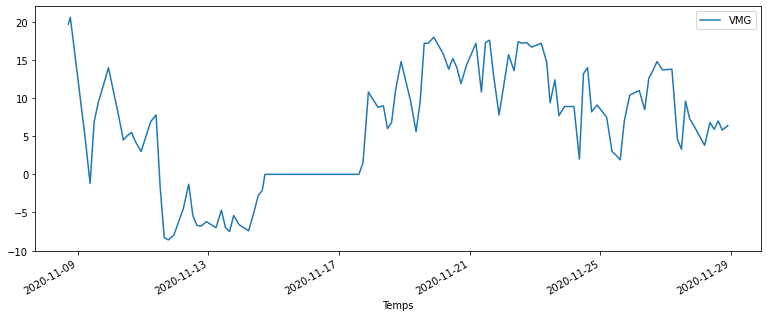

In [39]:
df_analyse.loc[df_analyse["Identifiant"]==8,["VMG","Temps"]].set_index("Temps").plot(figsize=(13,5))

In [40]:
carte_participant_temps(3,56,(45,0),5)

Affichage de la position et du trajet le 2020-11-12 00:00:00 des participants suivants:
['FABRICE AMEDEO']


Map(center=[45, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

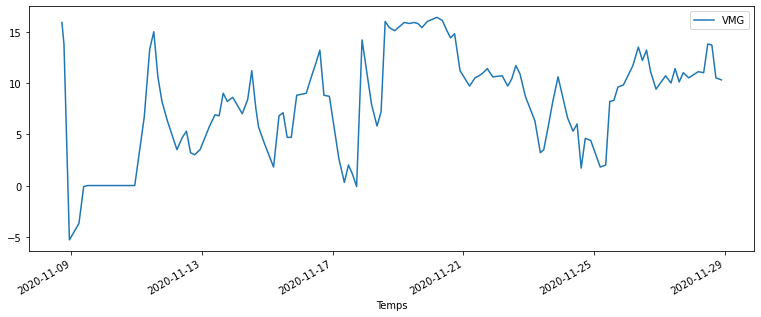

In [41]:
df_analyse.loc[df_analyse["Identifiant"]==56,["VMG","Temps"]].set_index("Temps").plot(figsize=(13,5))

Là aussi on voit que le Skipper a du faire retour arrière pour réparation avant de repartir. Info ici : https://www.letelegramme.fr/voile/vendee-globe/fabrice-amedeo-repartira-ce-soir-damien-seguin-plonge-10-11-2020-12654499.php

In [42]:
carte_participant_temps(16,69,(5,-30),6)

Affichage de la position et du trajet le 2020-11-25 00:00:00 des participants suivants:
['SÉBASTIEN DESTREMAU']


Map(center=[5, -30], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

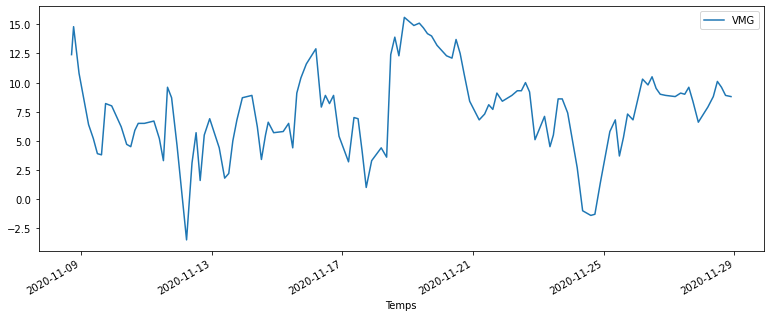

In [43]:
df_analyse.loc[df_analyse["Identifiant"]==69,["VMG","Temps"]].set_index("Temps").plot(figsize=(13,5))

Plus d'information sur cet incident : https://www.sport365.fr/voile-vendee-globe-grosse-avarie-destremau-10127921.html. N'étant pas dnas la même situation que les 2 précédents Skipper, celui-ci a pu réparer lui-même avant de repartir. Bravo à lui : https://sport24.lefigaro.fr/voile/vendee-globe/fil-infos/destremau-trouve-une-solution-pour-son-avarie-de-quille-1023169

## 3.2. Analyse descriptive - profil et série temporelle

On propose une fonction qui va retourner un profil en fonction de la propriété choisi et de l'identifiant des skippers.

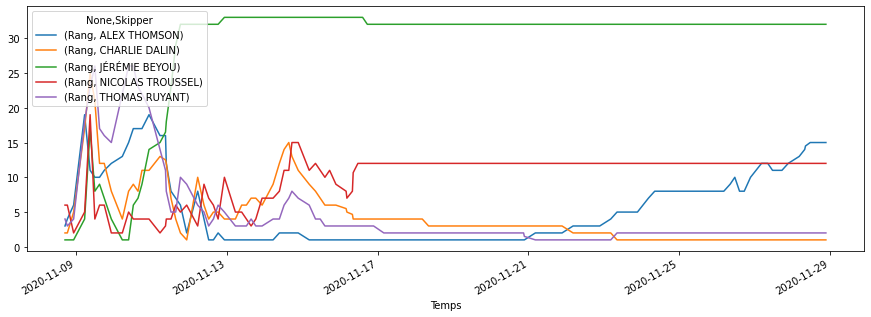

In [44]:
def profil_temps(v="Rang",x=[8,99,79,59,6],s=(15,5)): #par défaut les favoris Ouest France
    
    l=[]
    if type(x)== int:
        l.append(x)
    else:
        l=x
        
    profil=df_analyse[["Temps","Skipper",v]][df_analyse["Identifiant"].isin(l)]
    profil=profil.set_index(["Temps","Skipper"])
    return profil.unstack().interpolate().plot(figsize=s)

profil_temps()

Les favoris Ouest France ont réservé de nombreuse surpise. Pour rappel Nicolas Troussel a abandonné > la fonction interpolate montre ses limites.

Essayons maintenant d'utiliser cette fonction pour analyser l'état de la course par rapport au top 10 actuel.

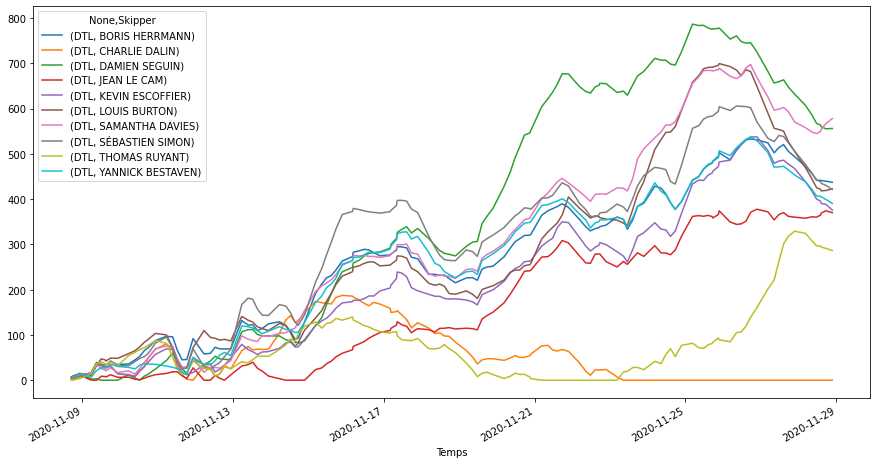

In [45]:
dernier_classement=df_analyse["Identifiant"][df_analyse["Rang"]<11].tail(10).tolist()
profil_temps("DTL",dernier_classement,(15,8))

En utilisant la variable DTL (plutot que Rang ou Vitesse), on peut accéder à une image plus fine des écarts entre les concurrents et de leur performance relative au jour le jour. 

Sur cette figure on voit en premier lieu clairement l'effet de dispersion au fil des jours. Alors que les écarts se creusent en deuxième semaine deux skippers (Ruyant et Dalin) se détachent du reste de la flotte avant que Ruyant entame un soudain retard à partir du 24 (avarie sur son foil :https://www.ouest-france.fr/vendee-globe/vendee-globe-dalin-conserve-son-avance-ruyant-victime-d-une-avarie-ce-qu-il-faut-retenir-7062621). 

Enfin on voit que parmi le Top 10, les 3 derniers skippers semblent avoir remonter les écarts ces derniers jours (Davis, Burton et Seguin). En se reportant au trajet carté ci-dessous on comprend qu'ils ont opté pour un cap plus orginial avec une distance plus longue que le reste de la flotte mais profitant de condition météo favorable. Le chemin le plus droit n'est pas forcément le plus court.

In [46]:
carte_participant_temps(20,[79,59,109,18,1000],(-40,-20),3)

Affichage de la position et du trajet le 2020-11-29 00:00:00 des participants suivants:
['CHARLIE DALIN', 'THOMAS RUYANT', 'SAMANTHA DAVIES', 'LOUIS BURTON', 'DAMIEN SEGUIN']


Map(center=[-40, -20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

## 3.2 Statistique des performances des corrélations et régression linéaire 

### 3.2.1 Corrélations et régression linéaire 

En premiere instance on vérifie qu'on a bien une corrélation entre le rang et la vitesse. Le rang étant une mesure catégorielle intégrant l'historique de la course, on ne peut pas la comparer directement avec la vitesse obtenu par le dernier classement.

On propose donc de simplement plotter par skipper la vitesse moyenne par rapport à son rang moyen.

<ipython-input-47-e24ed1db4dc7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cor=df_analyse.groupby('Skipper')["Rang","VMG"].mean()


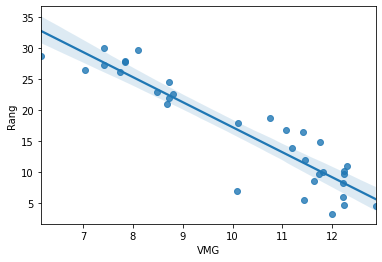

In [47]:
cor=df_analyse.groupby('Skipper')["Rang","VMG"].mean()
sns.regplot(cor["VMG"], cor["Rang"]);

<ipython-input-48-07a7c39b7fd7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cor=df_analyse.groupby('Skipper')["Rang","Vitesse"].mean()


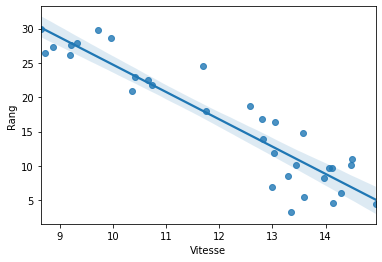

In [48]:
cor=df_analyse.groupby('Skipper')["Rang","Vitesse"].mean()
sns.regplot(cor["Vitesse"], cor["Rang"]);

### 3.2.2 Impact de la présence de Foils

Pour observer si la présence d'un foils avantage ou non un participant on propose d'observer la répartition de cette classement par rapport à leur vitesse et leur range. 

In [49]:
repartition_foils=df_analyse[0:33]["Foils"].value_counts()
repartition_foils

1    18
0    15
Name: Foils, dtype: int64

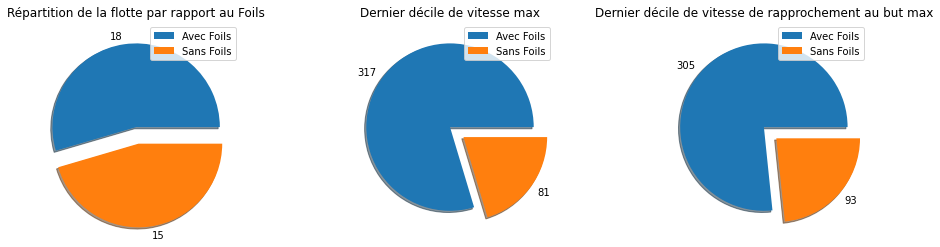

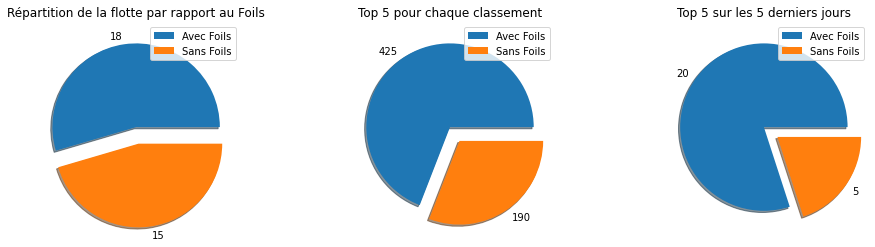

In [50]:
# On va compter le par classe foils (0 ou 1) la présence dans les meilleurs performances
vitesse_100=df_analyse.sort_values(["Vitesse"],ascending=[False]).head(int(df_analyse.shape[0]/10))["Foils"].value_counts().tolist()
vmg_100=df_analyse.sort_values(["VMG"],ascending=[False]).head(int(df_analyse.shape[0]/10))["Foils"].value_counts().tolist()
top_5_all=df_analyse.loc[df_analyse["Rang"]<6]["Foils"].value_counts().tolist()
top_5_last5days=df_analyse.loc[df_analyse["Rang"]<6]["Foils"].tail(25).value_counts().tolist()


plt.figure(1,figsize = (15, 15))
plt.subplot(1, 3, 1)
plt.title("Répartition de la flotte par rapport au Foils")
plt.pie(repartition_foils.tolist(),
        labels = repartition_foils.tolist()
        ,shadow = True,explode = [0, 0.2]);
plt.legend (["Avec Foils","Sans Foils"])
plt.subplot(1, 3, 2)
plt.title("Dernier décile de vitesse max")
plt.pie(vitesse_100,
        labels = vitesse_100
        ,shadow = True,explode = [0, 0.2]);
plt.legend (["Avec Foils","Sans Foils"]);
plt.subplot(1, 3, 3)
plt.title("Dernier décile de vitesse de rapprochement au but max")
plt.pie(vmg_100, labels = vmg_100,shadow = True,explode = [0, 0.2]);
plt.legend (["Avec Foils","Sans Foils"]);

plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0)
plt.show()

plt.figure(2,figsize = (15, 15))
plt.subplot(1, 3, 1)
plt.title("Répartition de la flotte par rapport au Foils")
plt.pie(repartition_foils.tolist(),
        labels = repartition_foils.tolist()
        ,shadow = True,explode = [0, 0.2]);
plt.legend (["Avec Foils","Sans Foils"])
plt.subplot(1, 3, 2)
plt.title("Top 5 pour chaque classement")
plt.pie(top_5_all, labels = top_5_all,shadow = True,explode = [0, 0.2]);
plt.legend (["Avec Foils","Sans Foils"]);
plt.subplot(1, 3, 3)
plt.title("Top 5 sur les 5 derniers jours")
plt.pie(top_5_last5days,
        labels = top_5_last5days
        ,shadow = True,explode = [0, 0.2]);
plt.legend (["Avec Foils","Sans Foils"]);
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0)
plt.show()

**On constate bien une surreprésentation des bateaux avec foil sur les meilleurs performances (vitesse et donc classement). Il s'agit bien d'un avantage indéniable pour la victoire à moins que celui ci soit une cause d'avarie comme montré par de nombreus participants**.

## Bonus : Mais pourquoi font ils route vers l'Est ? Phileas Fogg ou physique

A l'image de Phileas Fogg, les participants ont ils choisi de prendre ce cap pour gagner artificiellement 24h lors du passage du fuseau horaire pacifique ou pour une raison plus terre à tere. La réponse en image : 

In [51]:
from ipyleaflet import Map, TileLayer, basemaps
from ipyleaflet.velocity import Velocity
import xarray as xr
import os

if not os.path.exists('wind-global.nc'):
  url = 'https://github.com/benbovy/xvelmap/raw/master/notebooks/wind-global.nc'
  import requests
  r = requests.get(url)
  wind_data = r.content
  with open('wind-global.nc', 'wb') as f:
      f.write(wind_data)

center = [0, 0]
zoom = 1
m = Map(center=center, zoom=zoom, interpolation='nearest', basemap=basemaps.CartoDB.DarkMatter)

ds = xr.open_dataset('wind-global.nc')
display_options = {
    'velocityType': 'Global Wind',
    'displayPosition': 'bottomleft',
    'displayEmptyString': 'No wind data'
}
wind = Velocity(data=ds,
                zonal_speed='u_wind',
                meridional_speed='v_wind',
                latitude_dimension='lat',
                longitude_dimension='lon',
                velocity_scale=0.01,
                max_velocity=20,
                display_options=display_options)
m.add_layer(wind)

m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

![](https://media.giphy.com/media/S6ZiBgxqWocxPTgkVn/giphy.gif)